# Raspršeno adresiranje

### Upisivanje zapisa u pretince tablice raspršenih adresa

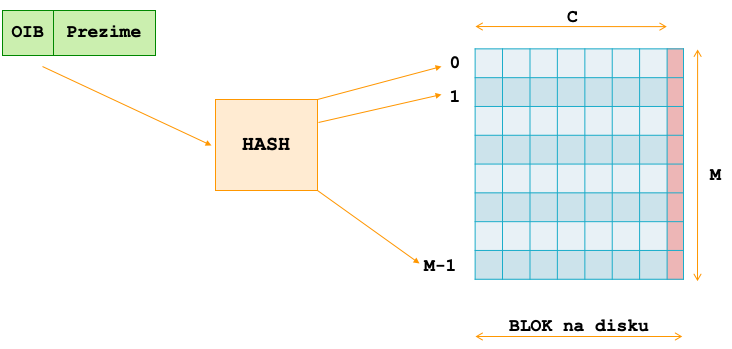

In [1]:
#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <math.h>
using namespace std;

In [2]:
FILE *f=NULL;
const char *ime_datoteke = NULL;

**Parametri**

In [3]:
typedef struct {
    int sifra;
    char naziv[50 + 1];
    float cijena;
}zapis;

In [4]:
#define MAXZAPIS 100
#define BLOK 512
#define C ((int)(BLOK/sizeof(zapis)))
const int M = (int)((MAXZAPIS/C)*1.3);

In [5]:
void print(zapis tmp){
    cout << "("
        << tmp.sifra << ", "
        << tmp.naziv << ", "
        << (float)tmp.cijena << ")\n";
}

In [6]:
int upis(FILE *f, int adr, zapis pom)
{
    zapis pretinac[C];
    int poc = adr;
    int i;
    i = poc;
    do {
        fseek(f, i * BLOK, SEEK_SET);
        fread(pretinac, sizeof(pretinac), 1, f);
        for (int j = 0; j < C; j++) {
            if (pretinac[j].sifra == pom.sifra) {
                cout << "Podatak postoji: " << pom.sifra << "\n";
                return 0;
            }if (pretinac[j].sifra == 0) {
                pretinac[j] = pom;
                fseek(f, i * BLOK, SEEK_SET);
                fwrite(pretinac, sizeof(pretinac), 1, f);
                cout << "M=" << setw(2) << left << i << " C=" << setw(2) << left << j << "-> ";
                print(pom);
                return 1;
            }
        }
        i = (i + 1) % M;
    } while (i != poc);
    return 0;
}

In [7]:
int adresa(int sifra) {
    return sifra % M;
}

In [8]:
{
    FILE *f = fopen("artikli.txt", "r+");
    zapis pom;
    fscanf(f,"%d,%[^,],%f", &pom.sifra, pom.naziv, &pom.cijena);
    print(pom);
    fclose(f);
}

(203, Kingmax DIMM 1GB DDR2 800MHz 240-pin, 137)


**Prebaci podatke u neformatiranu datoteku  "mjesta.dat"**

In [9]:
FILE *prepisi()
{
    FILE *fin = fopen("artikli.txt", "r+");
    
    f = fopen("artikli.dat", "wb+");
    
    int adr, br=0;
    int poc, i;
    zapis pom;
    zapis pret[C];
    
    // Format
    for (int j = 0; j < C; j++)
        pret[j].sifra = 0;
    for (int i = 0; i < M; i++)
    {
        fseek(f, i*BLOK, SEEK_SET);
        fwrite(pret, sizeof(pret), 1, f);
    }

    // Prebaci podatke
    while(fscanf(fin,"%d,%[^,],%f",&pom.sifra, pom.naziv, &pom.cijena) != EOF){
        adr = adresa(pom.sifra);
        if(upis(f, adr, pom) == 1)
            br++;
    }
    
    fclose(fin);

    cout << "Ukupno: " << br;
    
    return f;
}

**Tablica raspršenih adresa**

In [10]:
void ispis(FILE *f)
{
    zapis pret[C];   
    cout << setw(6) << " ";
    for (int i=0; i<C; i++)
        cout << "C=" << setw(3) << i;
    cout << "\n";
    for (int i=0; i<M; i++){
        fseek(f,i*BLOK, SEEK_SET);
        fread(pret,sizeof(zapis)*C,1,f);
        cout << "M=" << setw(4) << left << i;
        for(int j=0; j<C; j++)
            cout << setw(5)<<pret[j].sifra;
        cout <<"\n";
    }
}

In [12]:
f = prepisi();

input_line_19:2:6: error: assigning to 'FILE *' (aka '__sFILE *') from incompatible type 'void'
 f = prepisi();
     ^~~~~~~~~


Interpreter Error: 

### Zadatak 1.
Napisati funkciju koja će u neformatiranoj datoteci **artikli** organiziranoj po načelu raspršenog adresiranja prebrojiti koliko ima upisanih zapisa o artiklima. 
- BLOK - Veličina bloka
- C - broj zapisa u jednom pretincu
- M - broj pretinaca

Prototip funkcije:
> **int** brojzapisa(**FILE** *f)

In [23]:
int brojzapisa(FILE *f);
{   
    //Ovdje pisati kod
    zapis pret[C];
    int br=0;
    for(int i=0; i<M; i++){
        fseek(f, i * BLOK, SEEK_SET);
        fread(&pret, sizeof(zapis) * C, 1, f);
        for(int j=0; j<C; j++)
           if(pret[j].sifra != 0)
                br++;
    }
    return br;
}

33

### Zadatak 2.
Napisati funkciju koja će u neformatiranoj datoteci organiziranoj po načelu raspršenog adresiranja odrediti gustoću pakiranja.

- BLOK - Veličina bloka
- C - broj zapisa u jednom pretincu
- M - broj pretinaca

**Prototip funkcije:**
> **float** gustoca (**const char** *ime_datoteke);

In [24]:
float gustoca(FILE *f);
{
    int br=0;
    zapis pret[C];
    
    for(int i=0; i<M; i++){
        fseek(f, i * BLOK, SEEK_SET);
        fread(&pret, sizeof(zapis) * C, 1, f);
        for(int j=0; j<C; j++)
           if(pret[j].sifra != 0)
                br++;
    }
    return (float)br/(M*C);
}

0.275f

### Zadatak 3.

Napisati funkciju za pražnjenje neformatirane datoteke artikli organizirane po načelu raspršenog adresiranja.

In [25]:
void format(FILE *f);
{
    zapis pom[C];

    for (int j = 0; j < C; j++)
        pom[j].sifra = 0;

    for (int i = 0; i < M; i++)
    {
        fseek(f, i*BLOK, SEEK_SET);
        fwrite(pom, sizeof(pom), 1, f);
    }
}

**Ispis**

In [26]:
print(f);

      C=0  C=1  C=2  C=3  C=4  C=5  C=6  C=7  
M=0   0    0    0    0    0    0    0    0    
M=1   0    0    0    0    0    0    0    0    
M=2   0    0    0    0    0    0    0    0    
M=3   0    0    0    0    0    0    0    0    
M=4   0    0    0    0    0    0    0    0    
M=5   0    0    0    0    0    0    0    0    
M=6   0    0    0    0    0    0    0    0    
M=7   0    0    0    0    0    0    0    0    
M=8   0    0    0    0    0    0    0    0    
M=9   0    0    0    0    0    0    0    0    
M=10  0    0    0    0    0    0    0    0    
M=11  0    0    0    0    0    0    0    0    
M=12  0    0    0    0    0    0    0    0    
M=13  0    0    0    0    0    0    0    0    
M=14  0    0    0    0    0    0    0    0    
